# KMeans, clusterização e decision tree dos dados do Cartola FC
Por: [Gisliany Alves](https://github.com/gisliany), [Jusciaane Chacon](https://github.com/jusciaane) e [Marianne Diniz](https://github.com/MarianneDiniz)

## 1. Introdução aos dados

Os dados utilizados neste trabalho vem do repositório [caRtola](https://github.com/henriquepgomide/caRtola) no GitHub, que contém todos os dados do Cartola FC desde 2014. Para montar o dataset foram utilizados apenas os dados de todas as rodadas disponíveis de 2018. Os arquivos `rodada-i.csv`, onde $i$ representa o número da rodada, foram concatenados formando dataset `rodadas2018`, conforme o código a seguir.

In [0]:
# import e concatenação dos datasets das rodadas de 2018

import pandas as pd

rodadas = []
for i in range(1, 32):
  rodadas.append(pd.read_csv('rodada-' + str(i) + '.csv', index_col=0))

rodadas2018 = pd.concat(rodadas)
rodadas2018 = rodadas2018[rodadas[10].columns] # preserve column order
rodadas2018.shape

(25057, 32)

Cada linha representa o desempenho de um atleta em uma dada rodada. Existem 32 atributos listados em cada linha, cujo significado é mostrado na tabela 1.

In [0]:
rodadas2018.head()

,atletas.nome,atletas.slug,atletas.apelido,atletas.foto,atletas.atleta_id,atletas.rodada_id,atletas.clube_id,atletas.posicao_id,atletas.status_id,atletas.pontos_num,...,G,CV,A,I,DD,GS,FT,GC,PP,DP
1,Matheus Ferraz Pereira,matheus-ferraz,Matheus Ferraz,https://s.glbimg.com/es/sde/f/2018/03/17/6d461...,38632,1,AME,zag,Nulo,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Willian Lanes de Lima,lima,Lima,https://s.glbimg.com/es/sde/f/2018/03/17/3d9ef...,38506,1,AME,zag,Nulo,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rómulo Otero Vásquez,otero,Otero,https://s.glbimg.com/es/sde/f/2017/04/03/9fe40...,83004,1,ATL,mei,Provável,16.5,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Diego Ribas da Cunha,diego,Diego,https://s.glbimg.com/es/sde/f/2017/08/16/3ba37...,38909,1,FLA,mei,Provável,0.8,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Rodrigo Eduardo Costa Marinho,rodriguinho,Rodriguinho,https://s.glbimg.com/es/sde/f/2018/03/20/c125f...,61033,1,COR,mei,Provável,16.5,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
rodadas2018.columns

Index(['atletas.nome', 'atletas.slug', 'atletas.apelido', 'atletas.foto',
       'atletas.atleta_id', 'atletas.rodada_id', 'atletas.clube_id',
       'atletas.posicao_id', 'atletas.status_id', 'atletas.pontos_num',
       'atletas.preco_num', 'atletas.variacao_num', 'atletas.media_num',
       'atletas.clube.id.full.name', 'FF', 'FS', 'PE', 'RB', 'SG', 'CA', 'FC',
       'FD', 'G', 'CV', 'A', 'I', 'DD', 'GS', 'FT', 'GC', 'PP', 'DP'],
      dtype='object')

<center>**Tabela 1** </center>

| coluna          | descrição                                                
|-----------------|-----------------------------------------------------------|
| atleta.nome          | nome do atleta
| atleta.slug          | slug do atleta
| atleta.apelido         | apelido do jogador
| atleta.foto         | foto do jogador
| atleta.atleta_id        | id do jogador
| atleta.rodada_id        | id da rodada em que o jogador está participando
| atleta.clube_id        | id do clube do jogador
| atleta.posicao_id      | posição do jogador (gol:goleiro, zag:zagueiro, lat:lateral, mei:meia, ata:atacante, tec:técnico)
| atleta.status_id           | status do jogador (Provável, Suspenso, Nulo) 
| atleta.pontos_num          | pontuação do jogador                                      |
| atleta.preco_num           | preço do jogador                                          |
| atleta.variacao_num   | variação de preço                                         |
| atleta.media_num   | média de pontuação do jogador                                         |
| atletas.clube.id.full.name   | nome do clube do jogador                                        |
| FC              | faltas cometidas                                          |
| FD              | finalizações defendidas                                   |
| FF              | finalizações para fora                                    |
| FS              | faltas sofridas                                           |
| G               | gols                                                      |
| I               | impedimentos                                              |
| RB              | roubadas de bola                                          |
| CA              | cartões amarelo                                           |
| PE              | passes errados                                            |
| A               | assistências                                              |
| SG              | jogos sem sofrer gols                                     |
| DD              | defesas difíceis                                          |
| FT              | finalizações na trave                                     |
| GS              | gols sofridos                                             |
| CV              | cartões vermelho                                          |
| GC              | gols contra                                               |
| PP              | pênaltis perdidos                                               |
| DP              | defesas de pênalti                                               |

O método `info()` é útil para termos uma breve descrição dos dados. Particularmente, obtém-se o número total de linhas e o tipo e número de valores não-nulos de cada atributo.

In [0]:
rodadas2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25057 entries, 1 to 841
Data columns (total 32 columns):
atletas.nome                  25057 non-null object
atletas.slug                  25057 non-null object
atletas.apelido               25057 non-null object
atletas.foto                  24025 non-null object
atletas.atleta_id             25057 non-null int64
atletas.rodada_id             25057 non-null int64
atletas.clube_id              25057 non-null object
atletas.posicao_id            25057 non-null object
atletas.status_id             25057 non-null object
atletas.pontos_num            25057 non-null float64
atletas.preco_num             25057 non-null float64
atletas.variacao_num          25057 non-null float64
atletas.media_num             25057 non-null float64
atletas.clube.id.full.name    25057 non-null object
FF                            10471 non-null float64
FS                            13705 non-null float64
PE                            14524 non-null float64
RB  

Conforme se pode observar, muitos dos atributos contém valores nulos. A quantidade específica é mostrada na célula a seguir. Esse problema será tratado em uma seção posterior.

In [0]:
rodadas2018.isnull().sum()

atletas.nome                      0
atletas.slug                      0
atletas.apelido                   0
atletas.foto                   1032
atletas.atleta_id                 0
atletas.rodada_id                 0
atletas.clube_id                  0
atletas.posicao_id                0
atletas.status_id                 0
atletas.pontos_num                0
atletas.preco_num                 0
atletas.variacao_num              0
atletas.media_num                 0
atletas.clube.id.full.name        0
FF                            14586
FS                            11352
PE                            10533
RB                            11794
SG                            20053
CA                            15763
FC                            11388
FD                            16465
G                             20225
CV                            23992
A                             20845
I                             19514
DD                            24005
GS                          

O método describe() mostra um resumo estatístico dos atributos numéricos.

In [0]:
rodadas2018.describe()

,atletas.atleta_id,atletas.rodada_id,atletas.pontos_num,atletas.preco_num,atletas.variacao_num,atletas.media_num,FF,FS,PE,RB,...,G,CV,A,I,DD,GS,FT,GC,PP,DP
count,25057.000000,25057.000000,25057.000000,25057.000000,25057.000000,25057.000000,10471.000000,13705.000000,14524.000000,13263.000000,...,4832.000000,1065.000000,4212.000000,5543.000000,1052.000000,1115.000000,1963.000000,340.0,228.000000,188.000000
mean,81620.729616,16.174083,1.133203,5.049226,0.000328,1.837780,4.614459,9.454214,15.183489,11.413255,...,2.003518,1.074178,1.687559,2.477720,12.684411,9.836771,1.232807,1.0,1.052632,1.042553
std,18658.374015,8.967015,2.923694,3.826812,0.707719,2.321756,4.470732,10.254566,15.321005,12.633835,...,1.726901,0.299027,1.089754,2.418838,10.256985,8.300478,0.558781,0.0,0.223788,0.202386
min,36540.000000,1.000000,-8.600000,0.690000,-7.110000,-6.600000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
25%,71019.000000,8.000000,0.000000,2.000000,0.000000,0.000000,2.000000,2.000000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,4.750000,3.000000,1.000000,1.0,1.000000,1.000000
50%,86759.000000,16.000000,0.000000,4.000000,0.000000,1.200000,3.000000,6.000000,10.000000,7.000000,...,1.000000,1.000000,1.000000,2.000000,10.000000,8.000000,1.000000,1.0,1.000000,1.000000
75%,97322.000000,24.000000,0.600000,7.040000,0.000000,3.240000,6.000000,13.000000,21.000000,15.000000,...,2.000000,1.000000,2.000000,3.000000,19.000000,15.000000,1.000000,1.0,1.000000,1.000000
max,103645.000000,31.000000,31.100000,27.590000,10.780000,20.900000,34.000000,90.000000,112.000000,95.000000,...,16.000000,3.000000,10.000000,22.000000,55.000000,44.000000,4.000000,1.0,2.000000,2.000000


A seguir, o histograma dos dados numéricos, provendo uma visualização da distribuição das instâncias.

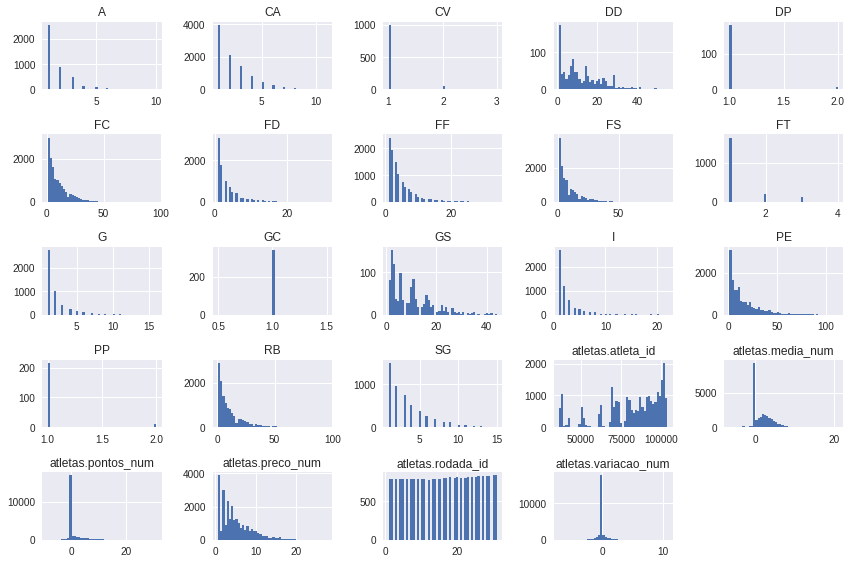

In [0]:
import matplotlib.pyplot as plt
rodadas2018.hist(bins=50, figsize=(12,8))
plt.tight_layout()
plt.show()

## 2. Limpeza dos dados

No dataset há 25057 instâncias e 32 atributos. Há 19 atributos com valores nulos, cerca de 20000 instâncias em cada atributo. Dessa forma, é inviável excluir 19 atributos ou 20000 intâncias. Dessa forma, uma limpeza no dadaset precisa ser feita. Para otimizar e automatizar essa etapa de sanitização dos dados, um pipeline foi criado, contendo uma etapa numérica e outra categórica.

### 2.1. Etapas (classes) do Pipeline Numérico

No que diz respeito às colunas numéricas, algumas delas como `atletas.atleta_id` e  `atletas.rodada_id` não são interessantes para a clusterização e, portanto, foram descartadas. Além disso, os atributos com mais de 50% de dados faltantes também foram removidos, de forma que as colunas `FF`, `SG`, `CA`, `FD`, `G`, `CV`, `A`, `I`, `DD`, `GS`, `FT`, `GC`, `PP`, `DP` não foram utilizadas para análise.

Para os demais atributos com valores faltantes, a imputação foi feita pela utilização da mediana, para evitar a influência de outliers (o que acontece ao se utilizar a média, por exemplo). Apenas para as colunas `FS`, `PE`, `RB` e `FC` que possuem menos de 50% de dados faltantes. Toda essa etapa de seleção de atributos é realizada na classe `NumericalSelector`.

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class NumericalSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names, threshold=0.5):
        self.threshold = threshold
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X[self.attribute_names]
        total_rows = X.shape[0]
        columns = X.columns[X.isnull().sum()/total_rows <= self.threshold]
        return X[columns]

Outra prática interessante, representada pela classe `CombinedAttributesAdder` é a de gerar novos atributos que podem auxiliar no processo de clusterização. Neste caso, foram geradas as razões `preco_por_rodada` e `FC_por_FS`. Ademais, foi acrescentada a coluna `atleta.valioso` que determina se o atleta é valioso ou não (atletas valiosos são aqueles cujo preço é acima da média).

In [0]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_extra_attributes = True):
        self.add_extra_attributes = add_extra_attributes

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        fc_per_fs = X['FC'] / X['FS']
        if self.add_extra_attributes:
            X['preco_por_rodada'] = X['atletas.preco_num'] / X['atletas.rodada_id']
            X['FC_por_FS'] = X['FC']/X['FS']
            
            mean = X['atletas.preco_num'].mean()
            X['atleta.valioso'] = X['atletas.preco_num'] > mean

        return X.values

### 2.2. Etapas (classes) do Pipeline Categórico

Em relação as colunas categóricas, foi feita uma análise e seleção apenas dos atributos de interesse na classe `CategoricalSelector`.

In [0]:
class CategoricalSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columnsToSelect=[]):
        self.columnsToSelect = columnsToSelect

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columnsToSelect].values

### 2.3. Construção do Pipeline

Nesta etapa, os pipelines são unidos em um só e são especificadas as colunas desejadas. Para o pipeline numérico, removeu-se antes as colunas `atletas.atleta_id` e `atletas.rodada_id`. As demais colunas passaram no pipeline. Para a parte categórica, utilizou-se apenas as colunas `atletas.posicao_id`, `atletas.status_id` e `atletas.clube_id`.

In [0]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, Imputer
from future_encoders import OneHotEncoder

num_attribs = rodadas2018.select_dtypes(include=['int', 'float']).columns[1:]
cat_attribs = ['atletas.posicao_id', 'atletas.status_id']

num_pipeline = Pipeline([('selector', NumericalSelector(attribute_names=num_attribs)),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('imputer', Imputer(strategy="median")),
                         ('std_scaler', StandardScaler())
                        ])

cat_pipeline = Pipeline([('selector', CategoricalSelector(cat_attribs)),
                         ('cat_encoder', OneHotEncoder(sparse=False))
                        ])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)
                                              ])

### 2.4. Função de aplicação do Pipeline e recuperação do dataset

Por fim, foi criada a função que utiliza o pipeline completo e reconstrói o dataset tratado.

In [0]:
def clean_df(df):
    data = full_pipeline.fit_transform(df)
    num_attribs_cleaned = list(num_pipeline.named_steps['selector'].transform(df[num_attribs]).columns)
    extra_attribs = ['preco_por_rodada', 'FC_por_FS', 'atleta.valioso']
    cat_encoder = cat_pipeline.named_steps['cat_encoder']

    columns = num_attribs_cleaned + extra_attribs
    for cat in list(cat_encoder.categories_):
        columns += list(cat)
    return pd.DataFrame(data, columns=columns)

In [0]:
clean_df(rodadas2018).isnull().sum()

atletas.rodada_id       0
atletas.pontos_num      0
atletas.preco_num       0
atletas.variacao_num    0
atletas.media_num       0
FS                      0
PE                      0
RB                      0
FC                      0
preco_por_rodada        0
FC_por_FS               0
atleta.valioso          0
ata                     0
gol                     0
lat                     0
mei                     0
tec                     0
zag                     0
Contundido              0
Dúvida                  0
Nulo                    0
Provável                0
Suspenso                0
dtype: int64

##### Datasets após a limpeza

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(rodadas2018, 
                                       test_size=0.2, 
                                       random_state=35)

print("data has {} instances\n {} train instances\n {} test intances".
      format(len(rodadas2018),len(train_set),len(test_set)))


rodadas=clean_df(rodadas2018)
train=clean_df(train_set)
test=clean_df(test_set)

data has 25057 instances
 20045 train instances
 5012 test intances


#### Correlação

Correlação entre as características após a limpeza dos dados

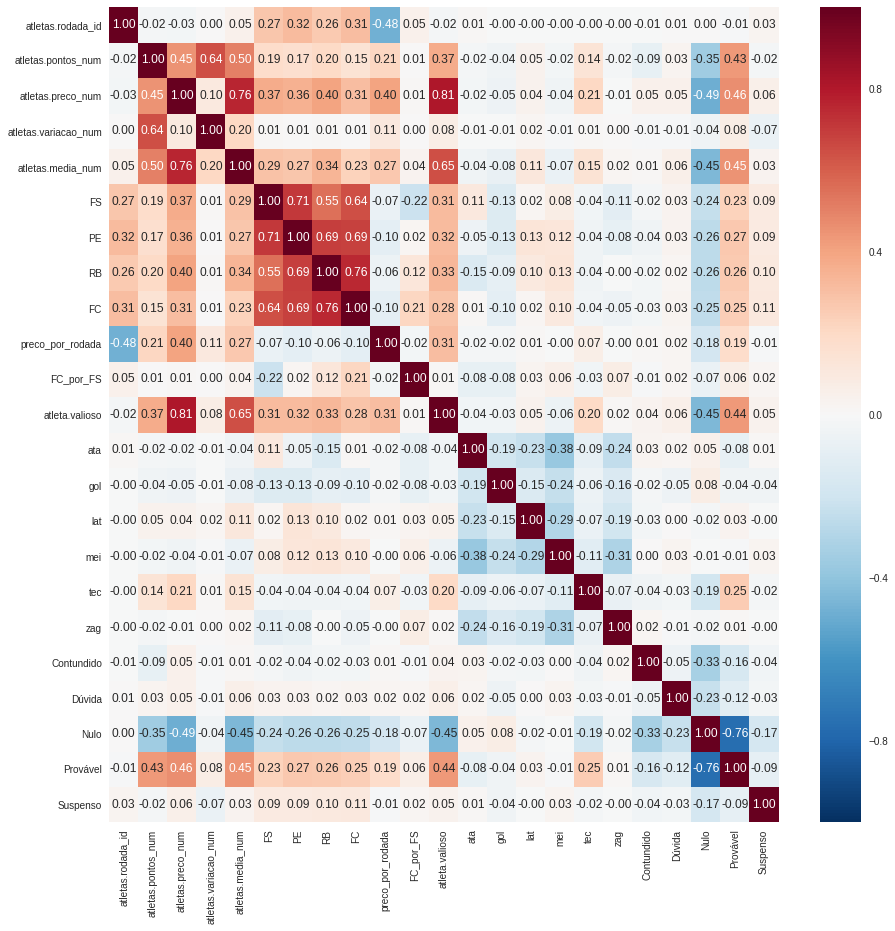

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
sns.heatmap(rodadas.corr(), 
            annot=True, fmt=".2f")

## 3. Clusterização

### 3.1. Análise dos meio campistas para clusterização

In [0]:
posicoes=['ata','gol', 'lat', 'tec', 'zag']
rodadasmeia =rodadas.drop(posicoes, axis=1)
meia=rodadasmeia[rodadasmeia['mei'] != 0]

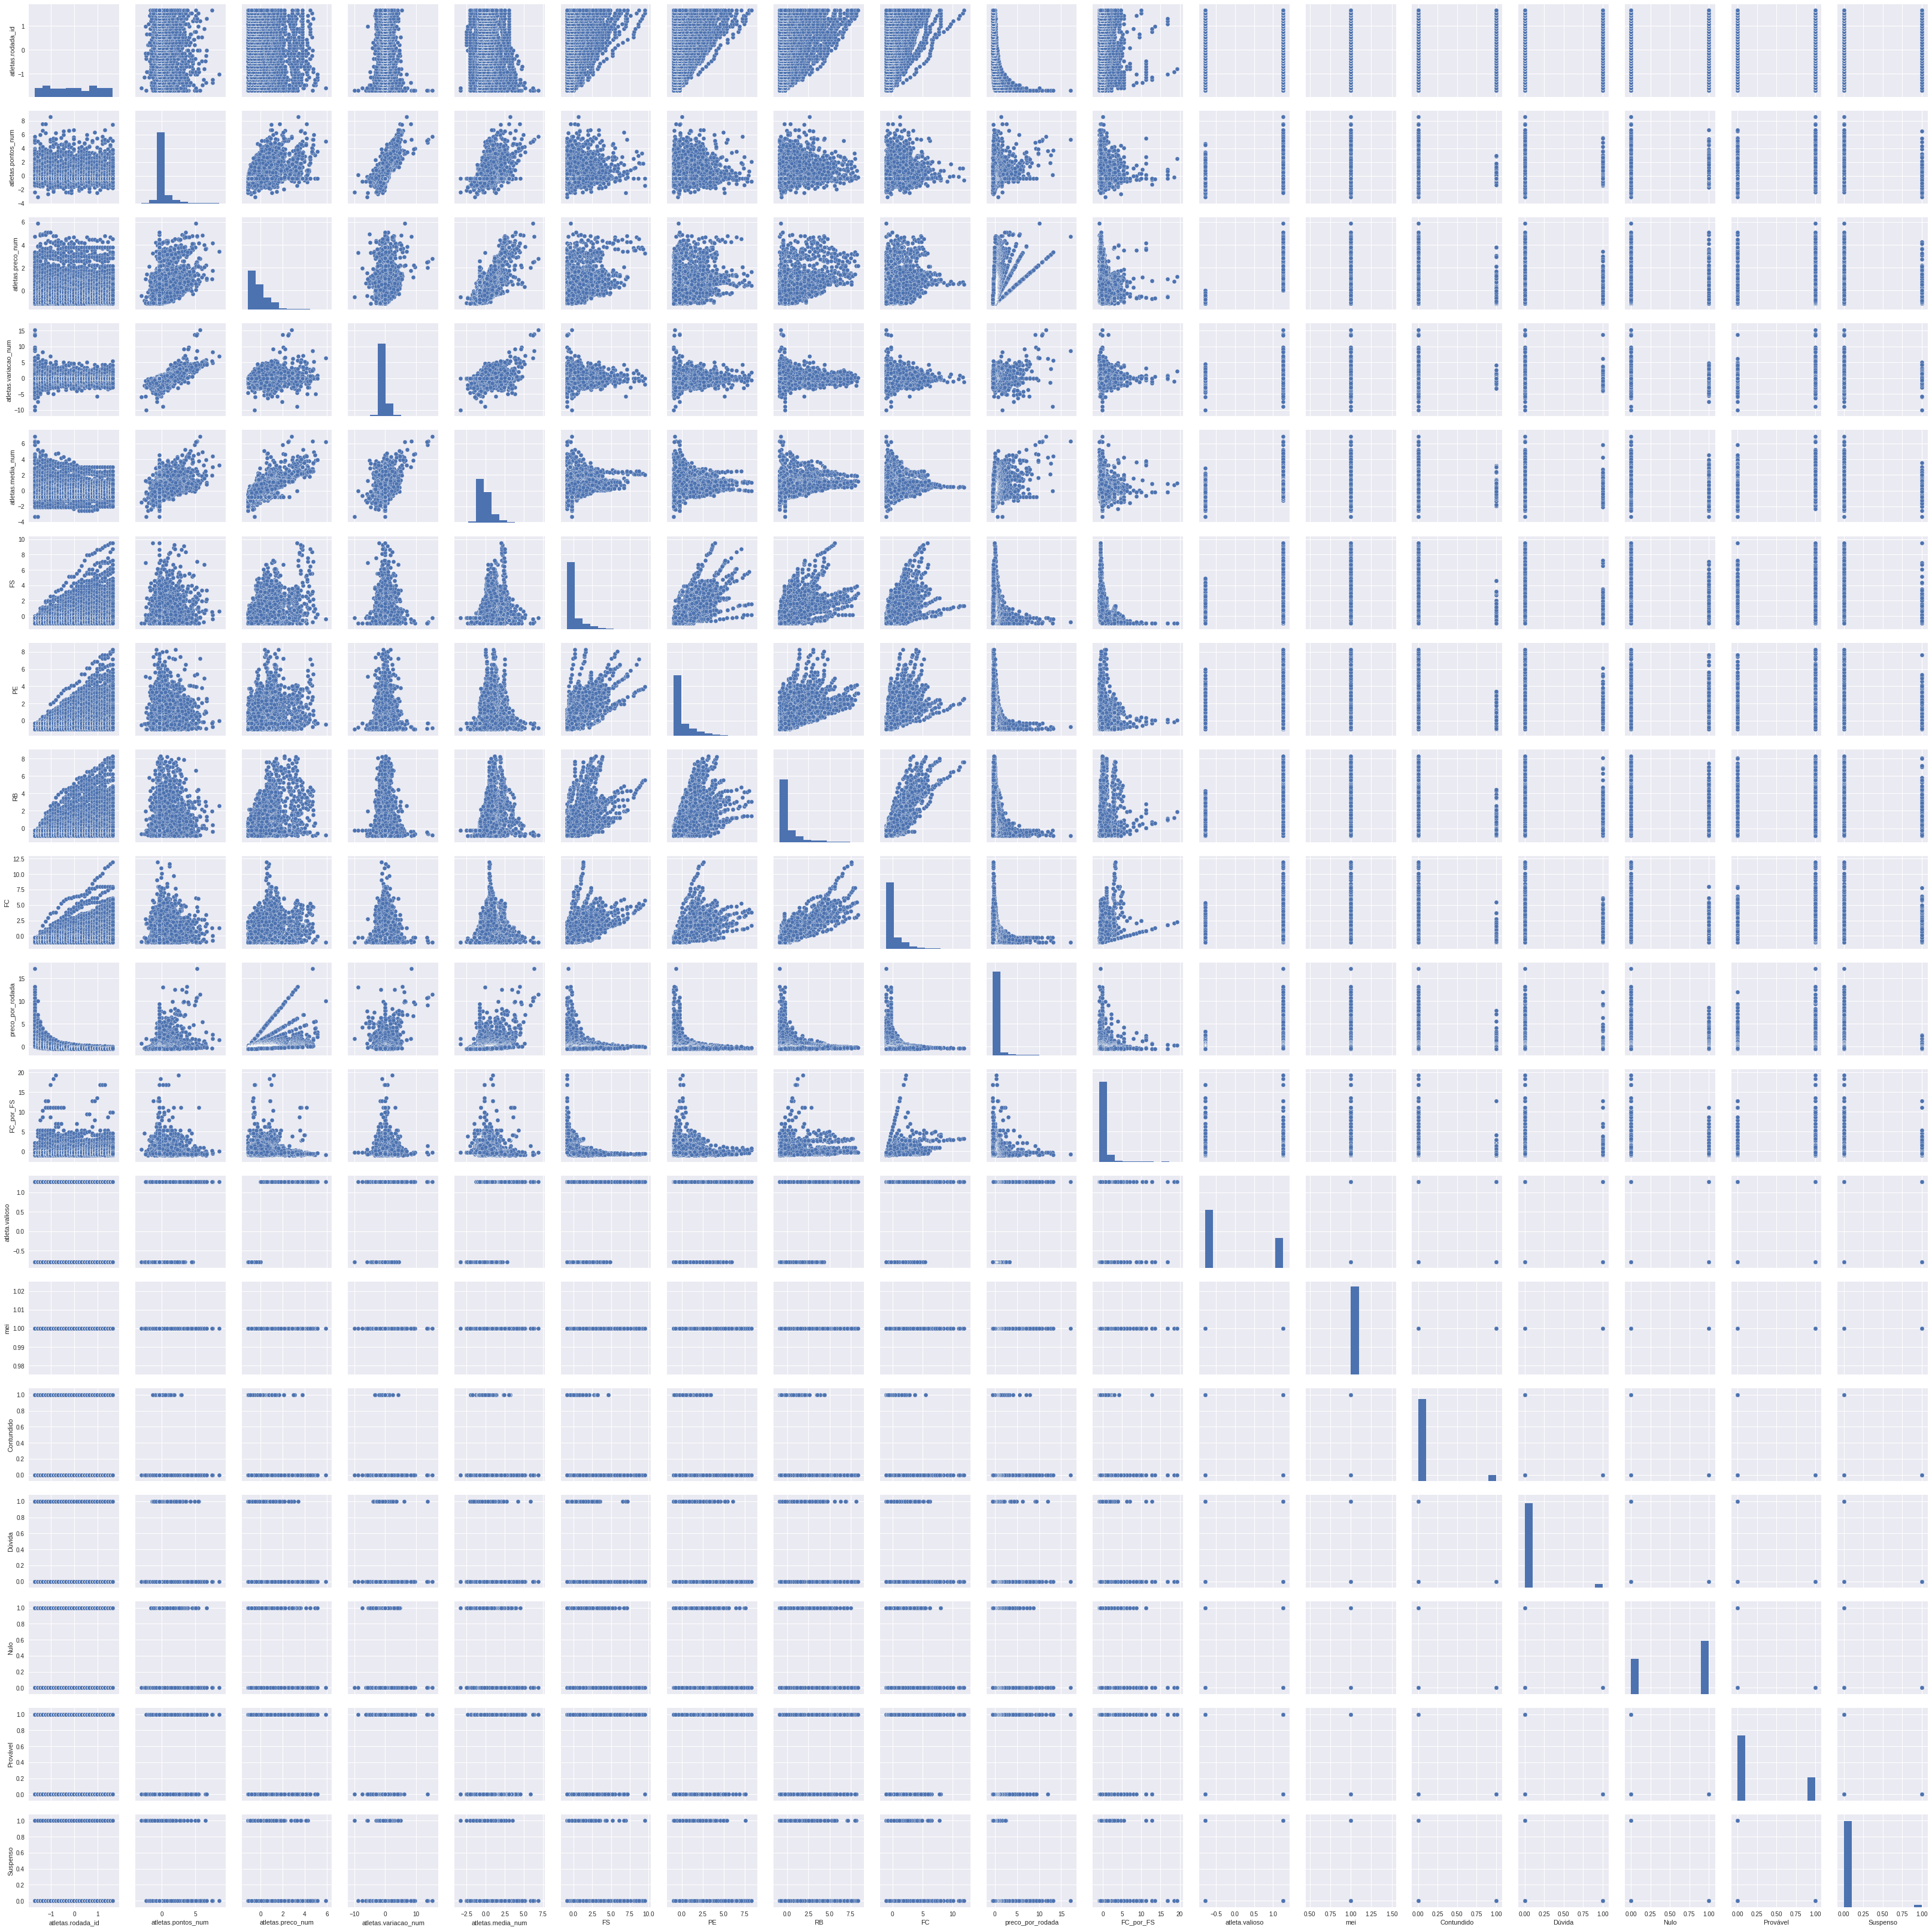

In [0]:
sns.pairplot(meia, diag_kind='hist')

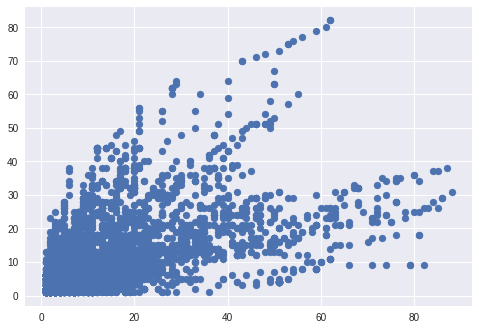

In [0]:
# Característica eleita para agrupar os meias
import numpy as np
import matplotlib.pyplot as plt
X=meia['RB']
y=meia['FS']
plt.scatter(X,y)
plt.show()

### k-means

In [0]:
# Visualização dos clusters
def visualize_clusters(df, num_clusters,col1,col2):
    colors = ['y', 'g', 'r', 'm']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df[col1], clustered_df[col2], c=colors[n-1])
        plt.xlabel('RB', fontsize=13)
        plt.ylabel('FS', fontsize=13)
    plt.show()

In [0]:
def visualize_kmeans(df, num_clusters, col1,col2):
  from sklearn.cluster import KMeans

  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df[[col1, col2]])
  df['cluster'] = kmeans.labels_
  visualize_clusters(df, num_clusters,col1,col2)

##### Vizualização dos clusters

Foi agrupado os jogadores meias em 4 clusters. Relacionando o número de Bolas roubadas e Faltas sofridas, ou seja, a habilidade do jogador em assumir a posse de bola frente a marcação do adversário.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


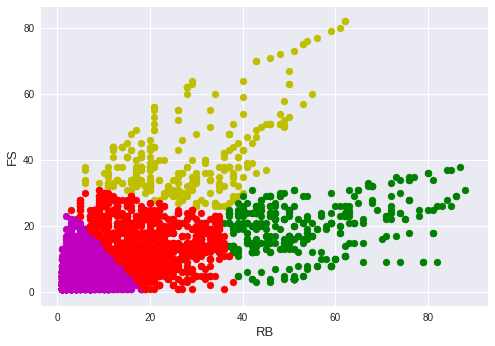

In [0]:
visualize_kmeans(meia,4 , 'RB','FS' )

In [0]:
meia.head(3)

,atletas.rodada_id,atletas.pontos_num,atletas.preco_num,atletas.variacao_num,atletas.media_num,FS,PE,RB,FC,preco_por_rodada,FC_por_FS,atleta.valioso,mei,Contundido,Dúvida,Nulo,Provável,Suspenso,cluster
2,1.0,16.5,14.81,9.81,16.5,2.0,10.0,3.0,1.0,14.81,0.500,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.8,10.89,-4.11,0.8,8.0,5.0,1.0,3.0,10.89,0.375,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,1.0,16.5,23.08,6.08,16.5,2.0,5.0,1.0,1.0,23.08,0.500,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1


colors = ['y', 'g', 'r', 'm']

grupo = [0,1,2,3]

###### Inferências:

Cluster rosa: meias menos atuantes no jogo - poucas bolas roubadas e com consequência poucas faltas sofridas, pois há menor posse de bola

Cluster vermelho: meias de atuação mediana no jogo - poucas bolas roubas e poucas faltas sofridas, mais atuante que o grupo preto.

Cluster amarelo: meias que sofrem mais marcação

Cluster verde: meias que roubam mais a bola

----------- Observando a performace dos meias frente ao pontos ------------------------------------------------------------ 

In [0]:
print (meia['atletas.pontos_num'][meia['cluster'] == 3].mean())
print(meia['atletas.pontos_num'][meia['cluster'] == 2].mean())
print(meia['atletas.pontos_num'][meia['cluster'] == 0].mean())
print(meia['atletas.pontos_num'][meia['cluster'] == 1].mean())

2.0876513317191283
2.5779891304347826
0.6337569240795047
2.7434375


A maior pontuação média obervada foi no cluster verde, no qual os jogadores possuem mais habilidade em roubar bola

----------- Observando a performace dos meias frente a razão FCFS ------------------------------------------------------------

In [0]:
print (meia['FC_por_FS'][meia['cluster'] == 3].mean())
print(meia['FC_por_FS'][meia['cluster'] == 2].mean())
print(meia['FC_por_FS'][meia['cluster'] == 0].mean())
print(meia['FC_por_FS'][meia['cluster'] == 1].mean())

1.5940566719880667
2.3359720573228535
1.3719289559288
0.6204931504900072


A média dos valores da razão FC_por_FS foi inversamente proporcional ao desempenho dos clusters. Os clusteres amarelo e verde apresentaram o fator FCFS menor que os clusters rosa e vermelho, evidenciando que "bons" jogadores sofrem mais faltas que cometem.

### Agrupando jogadores de alto valor

Agora, busca-se agrupar os jogadores em dois clusters: os de alto e os de baixo valor. Vale salientar que já temos esse atributo gerado em `atleta.valioso`, mas utilizaremos outros atributos para tentar agrupar os jogadores.

Usando 3 atributos conseguimos facilmente visualizar os agrupamentos. Jogadores de alto valor, em geral, tendem a ter uma boa performance e, portanto, uma média de pontos (`atletas.media_num`) elevada. Esses jogadores também são muito cotados para entrar em campo, tendo o `atletas.status_id` primordialmente igual à `Provável`. Por outro lado, atletas de baixo valor tem um status igual à `Nulo`.

In [0]:
from sklearn.cluster import KMeans

rodadas_cleaned = clean_df(rodadas2018)
kmeans_model = KMeans(n_clusters=2, random_state=1)
distances = kmeans_model.fit_transform(rodadas_cleaned[['atletas.media_num', 'Provável', 'Nulo']])

Nós podemos usar o método `crosstab()` do Pandas para computar e exibir quantos jogadores de cada classificação (em valioso ou não-valioso) ficaram em cada partido. Observemos que o cluster zero contém a maioria dos jogadores de baixo valor (90% deles), enquanto o cluster um contém a maioria dos jogadores considerados de alto valor (75% deles).

In [0]:
import numpy as np

labels = kmeans_model.labels_
pd.crosstab(np.array(labels), np.array(rodadas_cleaned['atleta.valioso']), colnames=['valioso'], rownames=['labels'])

valioso,0.0,1.0
labels,,
0,13934,2380
1,1548,7195


Por fim, podemos plotar as distâncias obtidas com a plicação do KMeans e visualizar os clusters no gráfico a seguir.

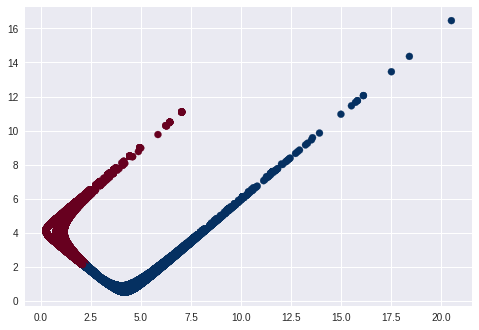

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x=distances[:,0], y=distances[:,1], c=labels, cmap='RdBu')
plt.show()

## Tomada de decisão (árvore de decisão)

O algoritmo DecisionTree será utilizado para resolver um problema de classificação e outro de regressão

##### Utilizando o DecisionTreeClassifier como classificador para prever a posição do jogador

A classificação utilizará algumas características ('atletas.preco_num','atletas.pontos_num','atletas.variacao_num','atletas.media_num', 'FS', 'PE', 'RB', 'FC', 'FC_por_FS') no vetor de atributo para classificar os jogadores em 3 classes: atacante, goleiro e técnico.

In [0]:
# colunas usadas como atributos
atributos0 = ['atletas.preco_num','atletas.pontos_num','atletas.variacao_num','atletas.media_num', 'FS', 'PE', 'RB', 'FC', 'FC_por_FS']

train_df= train[atributos0].copy()
for i in range(0,len(train)):
  if train.loc[i,'ata']==1:
    train_df.loc[i,'posicao']=0
  elif train.loc[i,'gol']==1 :
    train_df.loc[i,'posicao']=1
  elif train.loc[i,'lat']==1 :
    train_df.loc[i,'posicao']=2
  elif train.loc[i,'mei']==1 :
    train_df.loc[i,'posicao']=3
  elif train.loc[i,'tec']==1 :
    train_df.loc[i,'posicao']=4
  else: #train[i,'zag']==1 :
    train_df.loc[i,'posicao']=5
    
test_df= test[atributos0].copy()
for i in range(0,len(test)):
  if test.loc[i,'ata']==1:
    test_df.loc[i,'posicao']=0
  elif test.loc[i,'gol']==1 :
    test_df.loc[i,'posicao']=1
  elif test.loc[i,'lat']==1 :
    test_df.loc[i,'posicao']=2
  elif test.loc[i,'mei']==1 :
    test_df.loc[i,'posicao']=3
  elif test.loc[i,'tec']==1 :
    test_df.loc[i,'posicao']=4
  else: #test[i,'zag']==1 :
    test_df.loc[i,'posicao']=5

classe0=['posicao']    
#train
atacante_tr=train_df[train_df['posicao'] == 0]
goleiro_tr=train_df[train_df['posicao'] == 1]
tecnico_tr=train_df[train_df['posicao'] == 4]
frames_tr = [atacante_tr, goleiro_tr,tecnico_tr]
train_df_ = pd.concat(frames_tr)
#test
atacante_te=test_df[test_df['posicao'] == 0]
goleiro_te=test_df[test_df['posicao'] == 1]
tecnico_te=test_df[test_df['posicao'] == 4]
frames_tr = [atacante_te, goleiro_te,tecnico_te]
test_df_ = pd.concat(frames_tr)

Escolha dos parâmetros:

Foi utilizado o método GridSearchCV que escolherá os melhores parâmetros para min_samples_split e max_depth com 5x7 combinações.
O treinamento será realizado por meio da validação cruzada com 10-fold

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics  import  roc_auc_score

# valores dos hiperparametros
param_grid_cla = [{
            "min_samples_split": [2, 13, 30, 50, 100],
            "max_depth": [3,5,7,9,10,15,50]
             }]

# classificador
tree_cla = DecisionTreeClassifier()

# grid search com cross validation
#  5x7  =  35 combinations
grid_search_cla = GridSearchCV(tree_cla, 
                           param_grid_cla, 
                           cv=10,
                           scoring='accuracy')

In [0]:
#treinamento
grid_search_cla.fit(train_df_[atributos0], train_df_[classe0])

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'min_samples_split': [2, 13, 30, 50, 100], 'max_depth': [3, 5, 7, 9, 10, 15, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
#parâmetros escolhidos pelo método GridSearchCV
grid_search_cla.best_params_

{'max_depth': 50, 'min_samples_split': 2}

In [0]:
# características do melhor modelo
grid_search_cla.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Aplicando o modelo de classificação

In [0]:
modelo_cla = grid_search_cla.best_estimator_

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics  import  roc_auc_score

scores_acc = cross_val_score(modelo_cla, 
                         train_df_[atributos0], 
                         train_df_[classe0],
                         cv=10,
                         scoring='accuracy')

In [0]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [0]:
display_scores(scores_acc)

Scores: [0.81414702 0.83055556 0.82361111 0.81527778 0.80555556 0.83611111
 0.82916667 0.81944444 0.82172702 0.83426184]
Mean: 0.8229858098191454
Standard deviation: 0.009223854849085888


In [0]:
#teste
import numpy as np
from sklearn.metrics import accuracy_score
predictions_cla = modelo_cla.predict(test_df_[atributos0])
accuracy_score(test_df_[classe0],predictions_cla)

0.7681623931623932

###### Inferências

A métrica utilizada para avaliação a classificação foi a acurácia:



-------- Resultado do treinamento com validação cruzada (10-fold):

Scores: [0.81414702 0.83055556 0.82361111 0.81527778 0.80555556 0.83611111
 0.82916667 0.81944444 0.82172702 0.83426184]
 
Mean: 0.8229858098191454

Standard deviation: 0.009223854849085888

-------- Resultado do teste usando o modelo treinado:

0.7681623931623932

-------------------------------------------------------------------------------------------------------------------

A acurácia indica a precisão na classificação. Os valores de acurácia no treinamento e na fase de teste apresentaram bons resultados, acima de 75% de acertos. Porém durante o teste o resultado foi um pouco inferior a classificação, mas não caracterizando um problema de overfitng.

##### Utilizando o DecisionTreeRegressor para estimar a pontução de cada jogador

Prevendo o número de pontos do jogador utilizando todas as características como atributos.

In [0]:
# colunas usadas como atributos
atributos1 = ['atletas.preco_num', 'atletas.variacao_num','atletas.media_num', 'FS', 'PE', 'RB', 'FC', 'FC_por_FS','preco_por_rodada','ata','gol', 'lat','mei', 'tec', 'zag','Contundido', 'Dúvida', 'Nulo', 'Provável', 'Suspenso']
classe1=['atletas.pontos_num']

Escolha dos parâmetros:

Foi utilizado o método GridSearchCV que escolherá os melhores parâmetros para max_depth e max_features com 6x9 combinações.
O treinamento será realizado por meio da validação cruzada com 10-fold

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# valores dos hiperparametros
param_grid_reg = [{
            "max_depth": [1, 2, 4, 3, 5, 10],
            "max_features": ['auto',0.1, 0.2, 0.3, 0.4, 1, 2, 3, 4]
             }]

# classificador
tree_reg = DecisionTreeRegressor()

# grid search com cross validation
# 6 x 9 = 54 combinations
grid_search_reg = GridSearchCV(tree_reg, 
                           param_grid_reg, 
                           cv=10,
                           scoring='neg_mean_squared_error')

In [0]:
#fase de treinamento
grid_search_reg.fit(train[atributos1], train[classe1])

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 4, 3, 5, 10], 'max_features': ['auto', 0.1, 0.2, 0.3, 0.4, 1, 2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
#parâmetros escolhidos pelo método GridSearchCV
grid_search_reg.best_params_

{'max_depth': 5, 'max_features': 'auto'}

In [0]:
# características do melhor modelo
grid_search_reg.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Aplicando o modelo de regressão 

In [0]:
modelo_reg = grid_search_reg.best_estimator_

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

scores_mse = cross_val_score(modelo_reg, 
                         train[atributos1], 
                         train[classe1],
                         scoring="neg_mean_squared_error",
                         cv=10)
score_rmse=np.sqrt(-scores_mse)

In [0]:
display_scores(score_rmse)

Scores: [1.30331136 1.2983987  1.36542018 1.33253032 1.36155117 1.34250841
 1.35735221 1.4366354  1.364619   1.30180169]
Mean: 1.3464128458790345
Standard deviation: 0.03942449829570117


Teste

In [0]:
from sklearn.metrics import mean_squared_error

predictions_reg = modelo_reg.predict(test[atributos1])

mse = mean_squared_error(test[classe1], predictions_reg)
rmse = np.sqrt(mse)
print(rmse)

1.3141393465788482


###### Inferências

In [0]:
print ('Train - Min: ',train[classe1].min(),'Max: ',train[classe1].max())
print ('Test - Min: ',test[classe1].min(),'Max: ',test[classe1].max())

Train - Min:  atletas.pontos_num   -8.6
dtype: float64 Max:  atletas.pontos_num    25.8
dtype: float64
Test - Min:  atletas.pontos_num   -6.0
dtype: float64 Max:  atletas.pontos_num    31.1
dtype: float64


A métrica utilizada para avaliação a regressão foi a Raiz do Erro Quadrático Médio (RMSE):



-------- Resultado do treinamento com validação cruzada (10-fold):

Scores: [1.30331136 1.2983987  1.36542018 1.33253032 1.36155117 1.34250841
 1.35735221 1.4366354  1.364619   1.30180169]
 
Mean: 1.3464128458790345

Standard deviation: 0.03942449829570117

-------- Resultado do teste usando o modelo treinado:

1.3141393465788482

-------------------------------------------------------------------------------------------------------------------

O RMSE indica a diferença entre o valor que foi previsto pelo modelo e o valor real que foi observado. Os valores de RMSE tanto no treinamento quanto na fase de teste foram relativamente baixos (em comparação com a escala de valores dos pontos do dataset)

Além, disso o treinamento e teste tiveram resultados próximos, evidenciando qquenão houve problema relacionado a overfitting ou underfitting.